In [2]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

In [3]:
import networkx as nx

In [3]:


fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 

multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df


Making dataframe for fly number 1600
Making dataframe for fly number 1601
Making dataframe for fly number 1602
Making dataframe for fly number 1603
Making dataframe for fly number 1604
Making dataframe for fly number 1605
Making dataframe for fly number 1606
Making dataframe for fly number 1607
Making dataframe for fly number 1609
Making dataframe for fly number 1610
Making dataframe for fly number 1613
Making dataframe for fly number 1615
Making dataframe for fly number 1616
Making dataframe for fly number 1617
Making dataframe for fly number 1619


In [4]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_stripe, g_x = -1, g_y=0, b_x =0, b_y = 0, ch=0'
 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0'
 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y

In [5]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [6]:
yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']


In [7]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [8]:
pitch_down_WS_decrease = pitch_down.loc[((pitch_down['experimental_condition']=='condition=test'))]

pitch_up_WS_increase = pitch_up.loc[((pitch_up['experimental_condition']=='condition=test'))]

roll_cw_right_increase = roll_cw.loc[((roll_cw['experimental_condition']=='condition=test'))]

roll_ccw_left_increase = roll_ccw.loc[((roll_ccw['experimental_condition']=='condition=test'))]

yaw_right_right_increase = yaw_right.loc[((yaw_right['experimental_condition']=='condition=test'))]

yaw_left_left_increase = yaw_left.loc[((yaw_left['experimental_condition']=='condition=test'))]

In [9]:
yaw_left.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
1172,23.440243,"yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0",0.349962,1.009834,0.659871,1600,226.0,condition=baseline,5.158781,0.360734,...,55.207971,6.351615,19.022328,6.882851,92.478907,4.049214,0.411692,6.836079,0.0,0.0
1173,23.460243,"yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0",0.483584,1.041648,0.558064,1600,226.0,condition=baseline,5.243953,0.271064,...,53.774263,6.927210,18.407524,6.920378,92.272025,4.084828,0.299395,6.737867,0.0,0.0
1174,23.480243,"yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0",0.419955,0.978019,0.558064,1600,226.0,condition=baseline,5.182749,0.423986,...,56.120419,6.117824,18.933917,6.842034,92.162730,3.972384,0.436388,7.104013,0.0,0.0
1175,23.500243,"yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0",0.623569,1.105278,0.481709,1600,226.0,condition=baseline,5.310968,0.481829,...,53.778349,6.854038,18.728677,7.223870,91.980643,4.047716,0.331420,7.043224,0.0,0.0
1176,23.520243,"yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0",0.769917,1.187996,0.418079,1600,226.0,condition=baseline,5.507405,0.635751,...,52.332306,7.427259,18.502651,7.507824,92.642680,3.997677,0.263650,7.015225,0.0,0.0


In [11]:
#print(yaw_left.index[6602])
#print(yaw_left.index[6603])

In [12]:
y = yaw_left.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

170

In [15]:
#new_trial_inds
#new_trial_inds_shifted

In [16]:
new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

In [237]:
counter = 0
yaw_left['trial'] = ""
for trial_ind in new_trial_inds: 
    if counter == 0:
        yaw_left['trial'][0:trial_ind] = counter
    else: 
        yaw_left['trial'][new_trial_inds[counter-1]: trial_ind] = counter
    counter += 1
    

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
counter = 0
yaw_left['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        yaw_left['trial'][0:trial_ind] = counter
    else: 
        yaw_left['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1
    

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/pandas/core/series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/home/imag

In [18]:
#d = pd.DataFrame()
main_df = pd.DataFrame()
dfe= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_left.loc[(yaw_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

In [19]:
main_df.head()

,0,2,4,6,8,10,12,14,16,18,...,150,152,154,156,158,160,162,164,166,168
0,0.349962,0.559940,-7.635541e-02,0.076355,-0.184526,-0.101807,-0.311785,-0.069992,0.089081,0.025452,...,0.577179,0.216876,0.753359,0.142682,0.028536,-0.051365,-0.039951,0.028536,0.039951,0.262534
1,0.483584,0.089081,1.272590e-02,-0.133622,-0.241792,-0.006363,-0.101807,0.254518,0.095444,0.216340,...,0.485118,0.565020,-0.353851,-0.148389,-0.176925,0.011415,0.194047,0.079902,0.228291,0.074194
2,0.419955,0.006363,8.881784e-16,-0.108170,-0.165437,-0.012726,-0.069992,0.241792,0.108170,0.241792,...,0.456581,0.502240,-0.399509,-0.148389,-0.205462,0.000000,0.159804,0.085609,0.222583,0.034244
3,0.623569,0.076355,-1.908885e-02,-0.057267,-0.159074,-0.012726,-0.082718,0.254518,0.089081,0.178163,...,0.507947,0.547898,-0.365265,-0.131267,-0.176925,-0.005707,0.159804,0.074194,0.194047,0.034244
4,0.769917,0.089081,5.090361e-02,-0.063630,-0.165437,0.006363,-0.076355,0.248155,0.165437,0.184526,...,0.473703,0.502240,-0.365265,-0.119853,-0.182633,-0.011415,0.159804,0.074194,0.176925,0.159804


In [25]:
from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA = np.mean(main_df, axis =1)  #mean
#error = main_df.stack().std()  
error = main_df.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [33]:
#mean_WBA[35:65]
#mean_WBA[65:110]


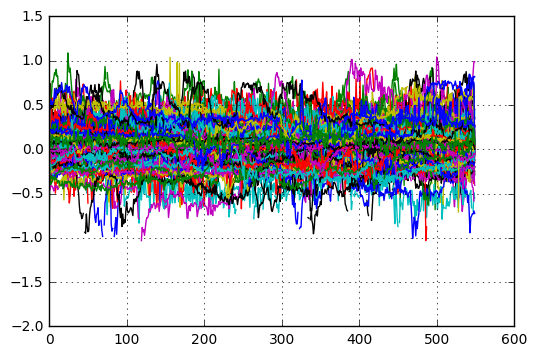

In [35]:
len(mean_WBA )

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [40]:
y2 = yaw_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
yaw_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        yaw_right['trial'][0:trial_ind] = counter
    else: 
        yaw_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right.loc[(yaw_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_yaw_right[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_yaw_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_yaw_right = np.mean(main_df_yaw_right, axis =1)  #mean
#error = main_df.stack().std()  
error_yaw_right = main_df_yaw_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
y2 = pitch_up.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_up['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_up['trial'][0:trial_ind] = counter
    else: 
        pitch_up['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_up.loc[(pitch_up['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_pitch_up[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_pitch_up = np.mean(main_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_up = main_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
y2 = pitch_down.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_down['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_down['trial'][0:trial_ind] = counter
    else: 
        pitch_down['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_down.loc[(pitch_down['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_pitch_down[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_pitch_down = np.mean(main_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_down = main_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
y2 = roll_cw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_cw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_cw['trial'][0:trial_ind] = counter
    else: 
        roll_cw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_cw = pd.DataFrame()
dfe_roll_cw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_cw.loc[(roll_cw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_roll_cw[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_roll_cw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_cw = np.mean(main_df_roll_cw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_cw = main_df_roll_cw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
y2 = roll_ccw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_ccw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_ccw['trial'][0:trial_ind] = counter
    else: 
        roll_ccw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_ccw = pd.DataFrame()
dfe_roll_ccw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_ccw.loc[(roll_ccw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_roll_ccw[counter] = ee
        if len(ee) > 600:
            main_df_roll_ccw[counter]= ee[0:550]
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            #print(len(ee))
            main_df_roll_ccw[counter] = ee
            
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_ccw = np.mean(main_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_ccw = main_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
time =inds/50.

In [61]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right.loc[(yaw_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_yaw_right[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_yaw_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_yaw_right = np.mean(WBF_df_yaw_right, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_yaw_right = WBF_df_yaw_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [62]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_yaw_left = pd.DataFrame()
dfe_yaw_left= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_left.loc[(yaw_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_yaw_left[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_yaw_left[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_yaw_left = np.mean(WBF_df_yaw_left, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_yaw_left = WBF_df_yaw_left.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [63]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_up.loc[(pitch_up['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_pitch_up[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_pitch_up = np.mean(WBF_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_pitch_up = WBF_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [64]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_down.loc[(pitch_down['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_pitch_down[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_pitch_down = np.mean(WBF_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_pitch_down = WBF_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [65]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_roll_cw = pd.DataFrame()
dfe_roll_cw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_cw.loc[(roll_cw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_roll_cw[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_roll_cw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_roll_cw = np.mean(WBF_df_roll_cw, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_roll_cw = WBF_df_roll_cw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [67]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_roll_ccw = pd.DataFrame()
dfe_roll_ccw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_ccw.loc[(roll_ccw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_roll_ccw[counter] = ee
        if len(ee) > 600:
            WBF_df_roll_ccw[counter]= ee[0:550]
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_roll_ccw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_roll_ccw = np.mean(WBF_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_roll_ccw = WBF_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [69]:
time =inds/50.

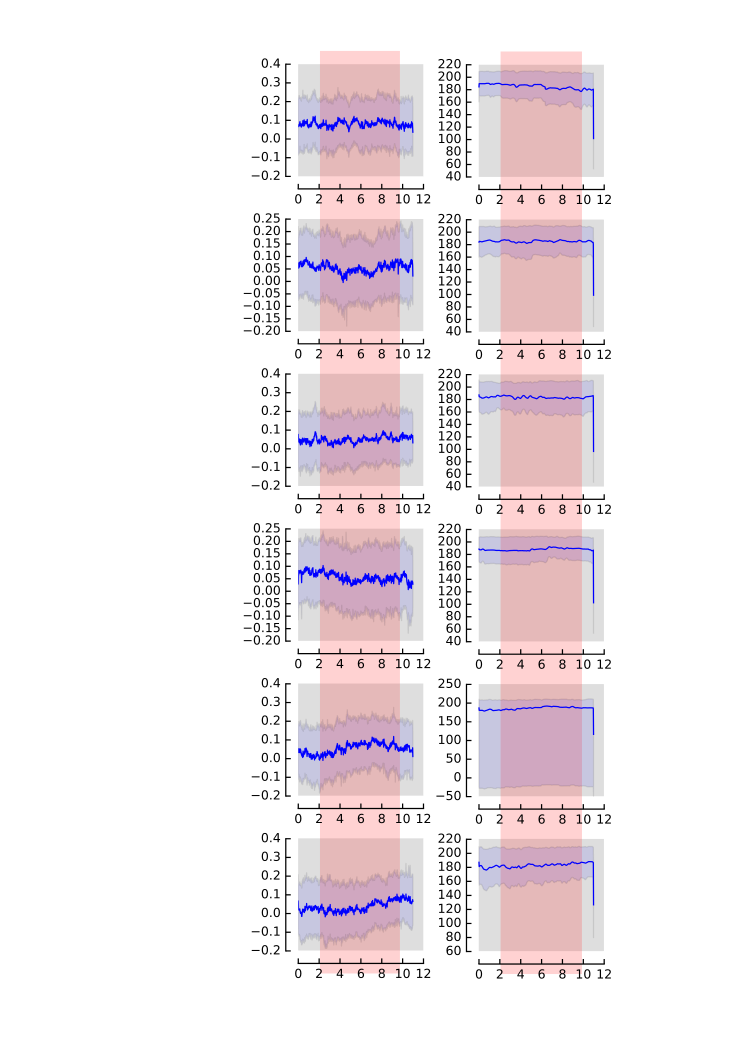

In [72]:
layout = fifi.FigureLayout('WSA_rot_matrx_layout.svg',make_mplfigures = True)

layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
layout.axes['yaw_left'].fill_between(time, (mean_WBA-error/2), (mean_WBA + error/2),alpha = 0.1)

layout.axes['yaw_right'].plot(time, mean_WBA_yaw_right) #,'o',alpha = 0.2)
layout.axes['yaw_right'].fill_between(time, (mean_WBA_yaw_right-error_yaw_right/2), (mean_WBA_yaw_right + error_yaw_right/2),alpha = 0.1)

layout.axes['pitch_up'].plot(time, mean_WBA_pitch_up) #,'o',alpha = 0.2)
layout.axes['pitch_up'].fill_between(time, (mean_WBA_pitch_up-error_pitch_up/2), (mean_WBA_pitch_up + error_pitch_up/2),alpha = 0.1)

layout.axes['pitch_down'].plot(time, mean_WBA_pitch_down) #,'o',alpha = 0.2)
layout.axes['pitch_down'].fill_between(time, (mean_WBA_pitch_down-error_pitch_down/2), (mean_WBA_pitch_down + error_pitch_down/2),alpha = 0.1)

layout.axes['roll_cw'].plot(time, mean_WBA_roll_cw) #,'o',alpha = 0.2)
layout.axes['roll_cw'].fill_between(time, (mean_WBA_roll_cw-error_roll_cw/2), (mean_WBA_roll_cw + error_roll_cw/2),alpha = 0.1)

layout.axes['roll_ccw'].plot(time, mean_WBA_roll_ccw) #,'o',alpha = 0.2)
layout.axes['roll_ccw'].fill_between(time, (mean_WBA_roll_ccw-error_roll_ccw/2), (mean_WBA_roll_ccw + error_roll_ccw/2),alpha = 0.1)




layout.axes['yaw_left_wbf'].plot(time, mean_WBF_yaw_left) #,'o',alpha = 0.2)
layout.axes['yaw_left_wbf'].fill_between(time, (mean_WBF_yaw_left-error_WBF_yaw_left/2), (mean_WBF_yaw_left + error_WBF_yaw_left/2),alpha = 0.1)

layout.axes['yaw_right_wbf'].plot(time, mean_WBF_yaw_right) #,'o',alpha = 0.2)
layout.axes['yaw_right_wbf'].fill_between(time, (mean_WBF_yaw_right-error_WBF_yaw_right/2), (mean_WBF_yaw_right + error_WBF_yaw_right/2),alpha = 0.1)

layout.axes['pitch_up_wbf'].plot(time, mean_WBF_pitch_up) #,'o',alpha = 0.2)
layout.axes['pitch_up_wbf'].fill_between(time, (mean_WBF_pitch_up-error_WBF_pitch_up/2), (mean_WBF_pitch_up + error_WBF_pitch_up/2),alpha = 0.1)

layout.axes['pitch_down_wbf'].plot(time, mean_WBF_pitch_down) #,'o',alpha = 0.2)
layout.axes['pitch_down_wbf'].fill_between(time, (mean_WBF_pitch_down-error_WBF_pitch_down/2), (mean_WBF_pitch_down + error_WBF_pitch_down/2),alpha = 0.1)

layout.axes['roll_cw_wbf'].plot(time, mean_WBF_roll_cw) #,'o',alpha = 0.2)
layout.axes['roll_cw_wbf'].fill_between(time, (mean_WBA_roll_cw-error_WBF_roll_cw/2), (mean_WBF_roll_cw + error_WBF_roll_cw/2),alpha = 0.1)

layout.axes['roll_ccw_wbf'].plot(time, mean_WBF_roll_ccw) #,'o',alpha = 0.2)
layout.axes['roll_ccw_wbf'].fill_between(time, (mean_WBF_roll_ccw-error_WBF_roll_ccw/2), (mean_WBF_roll_ccw + error_WBF_roll_ccw/2),alpha = 0.1)





fifi.mpl_functions.set_spines(layout)
layout.save('WSA_rot_matrx.svg')
plt.close('all')
display(SVG('WSA_rot_matrx.svg'))